# Spatial Analysis of Air Pollution and Chronic Disease Prevalence in Italy


<h3 align="center">Ricardo Esquivel D'Avanzo</h3>
<h3 align="center">r.esquiveldavanzo@studenti.unitn.it</h3>

# Introduction

Air pollution is a major environmental and public health concern around the world. It affects everyone in all income levels and countries and can lead to respiratory and cardiac diseases. This represents an important health issue whose effects are comparable to the risks of tobacco smoking and unhealthy dieting. Around the world, 4.2 million deaths each year can be attributed to air pollution, and 99% of the global population lives in places where air quality exceeds the 2015 WHO guideline [2].

The World Health Organization (WHO) refers to ambient air pollution as the presence in the air of one or more substances at a concentration of, or for a duration above, their natural levels with the potential to produce adverse health impacts [1]. Inside the same country, different regions have varying levels of pollution depending on factors such as urban density, levels of industrialization, and geographic landscape. Understanding whether there is a spatial association between pollution levels and chronic disease prevalence is crucial for informed public health planning and environmental regulation.

One common method for quantifying air pollution is studying the particulate matter concentration in the air. Particulate matter is a mixture of solid and liquid particles in the air that are small enough not to settle out onto the Earth’s surface under the influence of gravity and are classified by aerodynamic diameter [2]. These are classified by their aerodynamic diameter as either PM10 or PM2.5, where particles have an aerodynamic diameter equal to or less than 10 μm or 2.5 μm, respectively. This measure is important because PM10 particles are inhalable airborne particles, small enough to penetrate into the lungs and enter the bloodstream, and can potentially cause respiratory, cardiovascular, and other health issues [3].

The WHO defines a chronic disease as one that tends to be of long duration and is the result of a combination of genetic, physiological, environmental, and behavioural factors. The most common types of chronic diseases are cardiovascular diseases, cancers, chronic respiratory diseases, and diabetes [6]. People of all types are affected by chronic diseases, but conditions are often associated with several factors, including behavioural, metabolic, and environmental risks. Regarding the environmental risk factors that contribute to chronic diseases, air pollution is the most influential, accounting for 5.6 million deaths [6].


More specifically, respiratory tract diseases are diseases that affect the air passages, including the nasal passages, the bronchi and the lungs. They can be divided into  acute respiratory infections, and chronic respiratory diseases[10]. Acute diseases are infections that interfere with normal breathing and affect either the upper respiratory tract or lower respiratory tract. They are among the most common illnesses worldwide and a leading cause of morbidity and mortality in patients in risk, young children, the elderly, and immunocompromised individuals. A cause for acute respiratory diseases are pollutants in the air that can irritate and weaken the respiratory tract, making individuals more susceptible to infections [11].

Various studies have examined the pollution rates across Italy and their effect on health using different methodologies. The authors in [4] used satellite data and spatiotemporal predictors to study the relationship between daily counts of hospital admissions by municipality. More specifically, they conducted a nationwide study of Italy to evaluate the short-term effects of particulate matter (PM10 and PM2.5) on hospital admissions related to respiratory diseases between 2006 and 2015, accounting for both rural and urban areas. Five different health outcomes were evaluated to estimate nationwide effects through a meta-analysis of province-specific time series models. Another study performed a systematic review of information gathered from PubMed Central and official websites of European agencies and scientific societies to summarize the most updated evidence about the health effects of air pollution, with a special focus on Southern Europe [5]. While much of the research focuses on either studying the concentration levels of pollution in different parts of Italy or its effects on acute and chronic diseases, fewer studies integrate geospatial factors in their models to understand the distribution of pollution exposure and its relationship with chronic and acute diseases.

This study investigates the relationship between air pollution, measured through PM10 particulate matter, and chronic and acute respiratory conditions across Italian regions. Leveraging publicly available datasets from ISTAT and using geospatial data analysis techniques, we aim to answer the following research questions:

1. How do chronic disease rates vary across Italian regions?

2. How do respiratory diseases rates vary across Italian regions?

3. How do pollution rates vary across Italian regions?

4. Is there a significant spatial correlation between pollution and general chronic health outcomes?

5. Is there a significant spatial correlation between pollution and respiratory health outcomes?

Through geospatial statistics, visualization, and correlation analysis, this report presents evidence of spatial clustering and potential environmental health risks.


# Data Description

The datasets used in this study are obtained from ISTAT (Italian National Institute of Statistics) which are publicly available without significant usage restrictions. All the files used in this project have been organized within the project's data folder to facilitate accessibility and subsequent processing. This project, along with the utilized datasets is available in its github repository here.

## Administrative Boundaries

In order to map the Italian region, the administrative boundaries dataset is loaded [7]. It provides detailed information on the administrative boundaries of Italy, including geometries for regions, provinces, and other territorial divisions. For the purposes of the spatial analysis, only the subset of the regional boundaries are used. This subset includes data from 20 Italian regions. The dataset uses a projected Coordinate Reference System (CRS: EPSG:32632), which corresponds to UTM zone 32N. This provides a good geometric representation of Italy and minimizes distortions.

## Chronic Diseases Health Record

The second dataset from ISTAT (Italian National Institute of Statistics) provides detailed information on the health status of individuals residing in Italy [8] for the years 2022 and 2023. It presents data disaggregated by geographic area and specific chronic health conditions, offering a set of indicators that quantify the number of individuals affected by chronic diseases such as diabetes, hypertension, chronic bronchitis, osteoarthritis, osteoporosis, heart disease, allergic conditions, nervous system disorders, and gastric or duodenal ulcers. The dataset also distinguishes between different population groups: individuals with chronic conditions who report being in good health, those with at least one chronic disease, and those with two or more chronic diseases. The indicators are available in two formats: [THV], representing the number of individuals in thousands, and [HSC], indicating the number of affected individuals per 100 people with the same characteristics. This dataset provides valuable information about the number of individuals with a chronic disease in regard to the location. For the purpose of this study, the data is filtered to include only the value **"0_ALEAST_1CRON"**. It expresses the value of among 100 people with the same characteristics, how many have at least one chronic disease. This means people in the same self reported health condition (good, fair, poor), or demographic factors such as age group or gender, that have at least one chronic disease. This is a valuable measure that helps quantify the prevalence of any chronic disease.

## Diagnosis Data Set

The third dataset from ISTAT provides annual statistics on hospital discharges in Italy for the year 2023 [11]. It is categorized by main diagnosis type that include twenty medical conditions, such as circulatory system diseases, respiratory and digestive disorder, etc. It also distinguishes by type of hospitalization (inpatient care, day care, and total). The dataset provides information disaggregated per region and by the country of citizenship of the patient. The observation column provides the total number of hospital discharges associated with the medical condition per region. This dataset provides valuable information of the type of condition patients where treated for. For the purpose of this project, the data is filtered to include only the information about patients who where treated exclusively for respiratory diseases. 

## Air Pollutants Data Set

The fourth dataset contains annual air quality indicators across various parts of Italy for the period 2013 to 2022 [9]. It focuses on the concentrations of pollutants that are relevant to human health. The dataset includes maximum and highest recorded values for several key indicators such as PM10, PM2.5, NO₂, and O₃, measured over different timeframes. The temporal structure of the data varies depending on the specific indicator, with metrics such as the maximum number of days or hours over established limits. Data is collected from three distinct types of fixed monitoring stations: traffic, industrial, and background stations. The dataset is organized by year and geographic level, ranging from broad territorial divisions (e.g., Nord, Nord-Ovest) to individual municipalities (e.g., Torino, Vercelli). It is important to note that the dataset does not include a direct regional level breakdown. In this study we use the information regarding the level of PM10 at a municipal level. 



# Data Analysis
Preprocessing involves the manipulation of the dataset for a deeper analysis. Several steps where performed including data cleaning, filtering, transformation and merging of the data sets.

## Italian Administrative Territories Dataset Preprocessing


First the datasets of the Italian administrative territorries where downloaded. The dataset includes shapefiles for "Comuni" (Municipalities), "Province e Città Metropolitane" (Provinces and Metropolitan Cities), "Regioni" (Regions) and "Ripartizioni Geografiche" (Geographical Divisions). In this case we read the shapefile containing the regions.

In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.colors as mcolors
import zipfile
import urllib.request
import os
import esda
import splot.esda as splot
import numpy as np
import libpysal as lps
import statsmodels.api as sm
import seaborn as sns
from shapely.validation import make_valid
import mapclassify
import scipy.stats as stats

# Download and extract shapefile
if not os.path.exists('data/Limiti01012024_g'):
    zip_file_url = (
        "https://www.istat.it/storage/cartografia/confini_amministrativi/"
        "generalizzati/2024/Limiti01012024_g.zip"
    )
    zip_file_name = "Limiti01012024_g.zip"
    urllib.request.urlretrieve(zip_file_url, zip_file_name)
    with zipfile.ZipFile(zip_file_name, 'r') as z:
        z.extractall(path='data')
    os.remove(zip_file_name)

# Load Region shapefile
df_regions = gpd.read_file(
    'data/Limiti01012024_g/Reg01012024_g/Reg01012024_g_WGS84.shp'
)


Geometries are checked whether they are valid, if not, they are corrected to prevent conflict. We check the dataset's Coordinate Reference System (CRS). The output prints that it is set as EPSG:32632. It ensures that data in central Europe and Northen Italy, has accurate distance and area calculations within that zone by using a UTM projection. We also display the first 3 rows of the data set, look at the available columns, list and number the available region names.

In [2]:

# Ensure geometries are valid
if not df_regions.geometry.is_valid.all():
    df_regions['geometry'] = df_regions['geometry'].apply(make_valid)

# Check CRS
print("Coordinate reference system:", df_regions.crs)

# Display first 3 rows
print(df_regions.head(3))

print("Available columns:", df_regions.columns)
print("Available region names:", df_regions['DEN_REG'].unique())
print("Number of regions:", len(df_regions))

Coordinate reference system: EPSG:32632
   COD_RIP  COD_REG        DEN_REG    Shape_Leng    Shape_Area  \
0        1        1       Piemonte  1.234644e+06  2.539164e+10   
1        1        2  Valle d'Aosta  3.111871e+05  3.258608e+09   
2        1        3      Lombardia  1.411360e+06  2.386287e+10   

                                            geometry  
0  POLYGON ((457749.464 5145501.795, 458662.395 5...  
1  POLYGON ((390652.643 5091766.17, 390748.643 50...  
2  MULTIPOLYGON (((485536.498 4985444.636, 485366...  
Available columns: Index(['COD_RIP', 'COD_REG', 'DEN_REG', 'Shape_Leng', 'Shape_Area',
       'geometry'],
      dtype='object')
Available region names: ['Piemonte' "Valle d'Aosta" 'Lombardia' 'Trentino-Alto Adige' 'Veneto'
 'Friuli-Venezia Giulia' 'Liguria' 'Emilia-Romagna' 'Toscana' 'Umbria'
 'Marche' 'Lazio' 'Abruzzo' 'Molise' 'Campania' 'Puglia' 'Basilicata'
 'Calabria' 'Sicilia' 'Sardegna']
Number of regions: 20


## Chronic Diseases Health Dataset Preprocessing

The Health data set was retrieved from the ISTAT web service as a tab-separated file. The tab-separated file is read and loaded as "data/air_quality_data.csv". The data structure is explored by printing the available columns and unique "Territory", "Indicator", "DATA_TYPE" values. First we select the columns: 'Territory', 'DATA_TYPE', 'TIME_PERIOD' and 'Observation'. These contain the pertinent data for this study. "Territory" contains the geographic unit the observation refers to. "DATA_TYPE" contains labels describing the indicators of health condition of the population. 'TIME_PERIOD' refers to the year the observation. 'Observation' refers to the rate per 100 people who share the same characteristics. To ensure consistency with the geospatial data, inconsistent territory names were normalized. The Autonomous Provinces of Trento and Bolzano were merged into "Trentino-Alto Adige" and spelling and grammatical variations of "Valle d'Aosta" where unified into one version. The dataset is then filtered to include only the valid Italian regions matching those in the Italian Administrative Territories Dataset shapefiles. To ensure consistency across the project, the name of the "Territoty" column is changed to "regione". Finally, the cleaned list of regions is printed to confirm that the filtering worked as intended.

In [3]:
# Load health data
df = pd.read_csv("data/health_data.csv", sep='\t')

print(df.head(3))  # Display the first few rows of the DataFrame

print(df.columns)
print(df['Indicator'].unique())  # Show available indicators
print(df['Territory'].unique())  # Show available territories
print(df['DATA_TYPE'].unique())  # Show available data types
print("Number of Territories:", len(df['Territory'].unique()))
print("Number of DATA_TYPEs:", len(df['DATA_TYPE'].unique()))


# Select only "Territory", "DATA_TYPE", "TIME_PERIOD" and "Observation" columns
df = df[['Territory', 'DATA_TYPE', 'TIME_PERIOD', 'Observation']]

  FREQ Frequency REF_AREA Territory       DATA_TYPE  \
0    A    Annual       IT     Italy        0_GOOD_H   
1    A    Annual       IT     Italy        0_GOOD_H   
2    A    Annual       IT     Italy  0_ALEAST_1CRON   

                                           Indicator MEASURE  \
0  Persons by health conditions and the presence ...     HSC   
1  Persons by health conditions and the presence ...     HSC   
2  Persons by health conditions and the presence ...     HSC   

                                 Measure (DESC)  TIME_PERIOD  Observation  \
0  Per 100 people with the same characteristics         2022         70.2   
1  Per 100 people with the same characteristics         2023         68.7   
2  Per 100 people with the same characteristics         2022         40.4   

   OBS_STATUS  Observation status  
0         NaN                 NaN  
1         NaN                 NaN  
2         NaN                 NaN  
Index(['FREQ', 'Frequency', 'REF_AREA', 'Territory', 'DATA_TYPE', 'In

In [4]:
# List of valid region names from shapefile
valid_regions = [
    'Piemonte', "Valle d'Aosta", 'Lombardia', 'Trentino-Alto Adige', 'Veneto',
    'Friuli-Venezia Giulia', 'Liguria', 'Emilia-Romagna', 'Toscana', 'Umbria',
    'Marche', 'Lazio', 'Abruzzo', 'Molise', 'Campania', 'Puglia', 'Basilicata',
    'Calabria', 'Sicilia', 'Sardegna'
]

# Normalize names
df['Territory'] = df['Territory'].replace({
    '\'Valle d"\'Aosta / Vallée d"\'Aoste\'': "Valle d'Aosta",
    "Trentino-Alto Adige / Südtirol": "Trentino-Alto Adige",
    "Provincia Autonoma Trento": "Trentino-Alto Adige",
    "Provincia Autonoma Bolzano / Bozen": "Trentino-Alto Adige"
})

# Keep only rows with valid region names
df_health = df[df['Territory'].isin(valid_regions)]
df_health = df_health.rename(columns={'Territory': 'regione'})


# Check result
print(df_health['regione'].unique())
print("Number of Regions:", len(df_health['regione'].unique()))

df_health.isnull().sum()  # Check for missing values
print(df_health.columns)


['Piemonte' "Valle d'Aosta" 'Liguria' 'Lombardia' 'Trentino-Alto Adige'
 'Veneto' 'Friuli-Venezia Giulia' 'Emilia-Romagna' 'Toscana' 'Umbria'
 'Marche' 'Lazio' 'Abruzzo' 'Molise' 'Campania' 'Puglia' 'Basilicata'
 'Calabria' 'Sicilia' 'Sardegna']
Number of Regions: 20
Index(['regione', 'DATA_TYPE', 'TIME_PERIOD', 'Observation'], dtype='object')



Finally, the health and regions datasets are merged to enable spatial analysis. Specifically, the **"DEN\_REG"** column from the regions dataset is matched with the **"regione"** column from the health dataset. The resulting merged dataset, named **"df\_health\_regions_full"**, contains the following columns: *'regione'*, *'DATA\_TYPE'*, *'TIME\_PERIOD'*, *'Observation'*, and *'geometry'*. For the purpose of this study, the **"DATA\_TYPE"** column is filtered to include only the value **"0_ALEAST_1CRON"**. It expresses the value of among 100 people with the same characteristics, how many have at least one chronic disease. We observe that the regions have two entries corresponding to the measurements for both years 2022 and 2023. We choose the data from 2022. Additionally, Trentino-Alto Adige has multiple entries corresponding to the provinces of Trento and Bolzano. For this study, we take the mean value of the entries per region.


In [5]:
# Merge health data with region geometries
df_health_regions_full = df_regions.merge(df_health, left_on='DEN_REG', right_on='regione')


# [0_CHRONIC_GH] persons with chronic diseases in good health
# Filter for DATA_TYPE == '0_CHRONIC_GH' and TIME_PERIOD == 2022
df_health_regions_filtered = df_health_regions_full[
    (df_health_regions_full['DATA_TYPE'] == '0_ALEAST_1CRON') &
    (df_health_regions_full['TIME_PERIOD'] == 2023)
]


# Keep only relevant columns
df_health_regions_filtered = df_health_regions_filtered[['regione', 'DATA_TYPE', 'TIME_PERIOD', 'Observation', 'geometry']]

# Compute mean Observation per region
df_health_region_mean = (
    df_health_regions_filtered
    .groupby("regione")
    .agg({
        "Observation": "mean",
        "DATA_TYPE": "first",       # still '0_CHRONIC_GH'
        "TIME_PERIOD": "first",     # all are 2022
        "geometry": "first"
    })
    .reset_index()
)

# Ensure it's a GeoDataFrame
df_health_region_mean = gpd.GeoDataFrame(df_health_region_mean, geometry="geometry")

df_health_region_mean


,regione,Observation,DATA_TYPE,TIME_PERIOD,geometry
0,Abruzzo,39.0,0_ALEAST_1CRON,2023,"POLYGON ((901822.804 4760729.009, 901877.308 4..."
1,Basilicata,44.0,0_ALEAST_1CRON,2023,"MULTIPOLYGON (((1073707.061 4445700.105, 10737..."
2,Calabria,39.1,0_ALEAST_1CRON,2023,"MULTIPOLYGON (((1083358.846 4416348.74, 108334..."
3,Campania,37.4,0_ALEAST_1CRON,2023,"MULTIPOLYGON (((1037330.461 4449410.335, 10373..."
4,Emilia-Romagna,43.2,0_ALEAST_1CRON,2023,"MULTIPOLYGON (((618343.929 4893985.66, 618335...."
5,Friuli-Venezia Giulia,39.5,0_ALEAST_1CRON,2023,"MULTIPOLYGON (((871036.678 5066768.855, 871032..."
6,Lazio,41.0,0_ALEAST_1CRON,2023,"MULTIPOLYGON (((876021.906 4524682.296, 875656..."
7,Liguria,43.9,0_ALEAST_1CRON,2023,"MULTIPOLYGON (((568227.844 4874810.869, 568220..."
8,Lombardia,40.4,0_ALEAST_1CRON,2023,"MULTIPOLYGON (((485536.498 4985444.636, 485366..."
9,Marche,39.5,0_ALEAST_1CRON,2023,"POLYGON ((802366.734 4874989.456, 803616.974 4..."


## Main Diagnosis Dataset Preprocessing

The Diagnosis dataset follows a similar preprocessing strategy. It is loaded from a semicolon-separated file, and its structure is explored by printing the available columns and unique territory names. From the Territory names, it is evident that the data is also organized across a mix of Italian administrative and statistical territories, by region or by territorial division. To proceed with the project and conduct the analysis at the regional level.

Again, to ensure consistency with the geospatial data, inconsistent territory names were normalized. Each territory is mapped to its specific region. The autonomous provinces of Bolzano and Trentino were merged into "Trentino-Alto Adige" and spelling and grammatical variations of "Valle d'Aosta" where unified into one version. Other territorial divisions such as 'Nord' or 'Nord-ovest' all intentionally filtered out. The dataset is filtered to include only the valid Italian regions matching those in the Italian Administrative Territories Dataset shapefiles. From the list of available columns, we select only: 'Territory', 'CITAREA_MOSTRELCOUNTRY', 'Type of hospitalization', 'Indicator', 'TYPE_HOSPITALIZATION', 'MAIN_DIAGNOSIS', 'Main diagnosis', 'TIME_PERIOD','Sex (DESC)','Observation'.


In [6]:
# Load diagnosis health data

df = pd.read_csv(
    "data/diagnostic_principale.csv",
    sep=";",
    dtype={"NOTE_REF_AREA": str, "Territory (NOTE_REF_AREA)": str},
    low_memory=False
)

print(df.columns)
df = df[['Territory', 'CITAREA_MOSTRELCOUNTRY', 'Type of hospitalization', 'Indicator', 'TYPE_HOSPITALIZATION', 'MAIN_DIAGNOSIS', 'Main diagnosis', 'TIME_PERIOD','Sex (DESC)','Observation']]

print("Territories:",df['Territory'].unique())  # Show available territories
print("MAIN_DIAGNOSIS:",df['MAIN_DIAGNOSIS'].unique())  # Show available data types


# List of valid region names from shapefile
valid_regions = [
    'Piemonte', "Valle d'Aosta", 'Lombardia', 'Trentino-Alto Adige', 'Veneto',
    'Friuli-Venezia Giulia', 'Liguria', 'Emilia-Romagna', 'Toscana', 'Umbria',
    'Marche', 'Lazio', 'Abruzzo', 'Molise', 'Campania', 'Puglia', 'Basilicata',
    'Calabria', 'Sicilia', 'Sardegna'
]

# Normalize names
df['Territory'] = df['Territory'].replace({
    '\'Valle d"\'Aosta / Vallée d"\'Aoste\'': "Valle d'Aosta",
    "Trentino-Alto Adige / Südtirol": "Trentino-Alto Adige",
    "Provincia Autonoma Trento": "Trentino-Alto Adige",
    "Provincia Autonoma Bolzano / Bozen": "Trentino-Alto Adige"
})

# Keep only rows with valid region names
df_diagnosis = df[df['Territory'].isin(valid_regions)]
df_diagnosis = df_diagnosis.rename(columns={'Territory': 'regione'})

# Check result
print(df_diagnosis['regione'].unique())
print("Number of Regions:", len(df_diagnosis['regione'].unique()))

df_diagnosis.isnull().sum()  # Check for missing values
print(df_diagnosis.columns)


Index(['FREQ', 'Frequency', 'REF_AREA', 'Territory', 'DATA_TYPE', 'Indicator',
       'TYPE_HOSPITALIZATION', 'Type of hospitalization', 'SEX', 'Sex (DESC)',
       'CITAREA_MOSTRELCOUNTRY', 'Citizenship area and most relevant country',
       'MAIN_DIAGNOSIS', 'Main diagnosis', 'TIME_PERIOD', 'Observation',
       'OBS_STATUS', 'Observation status', 'NOTE_REF_AREA',
       'Territory (NOTE_REF_AREA)', 'NOTE_DATA_TYPE',
       'Indicator (NOTE_DATA_TYPE)', 'NOTE_TYPE_HOSPITALIZATION',
       'Type of hospitalization (NOTE_TYPE_HOSPITALIZATION)', 'NOTE_SEX',
       'Sex (NOTE_SEX)', 'NOTE_CITAREA_MOSTRELCOUNTRY',
       'Citizenship area and most relevant country (NOTE_CITAREA_MOSTRELCOUNTRY)',
       'NOTE_MAIN_DIAGNOSIS', 'Main diagnosis (NOTE_MAIN_DIAGNOSIS)',
       'NOTE_TIME_PERIOD', 'Time (NOTE_TIME_PERIOD)', 'BASE_PER', 'Base year',
       'UNIT_MEAS', 'Measure unit', 'UNIT_MULT', 'Multiplication unit'],
      dtype='object')
Territories: ['Italy' 'Nord' 'Nord-ovest' 'Piemonte'



The diagnostic and regions datasets are merged to enable spatial analysis. Specifically, the **"DEN\_REG"** column from the regions dataset is matched with the **"regione"** column from the diagnostic dataset. The resulting merged dataset, named **"df_diagnosis_regions_full"**, contains the following columns: 'regione', 'CITAREA_MOSTRELCOUNTRY', 'Type of hospitalization','Indicator', 'TYPE_HOSPITALIZATION', 'MAIN_DIAGNOSIS', 'Main diagnosis','TIME_PERIOD', 'Sex (DESC)', 'Observation'. For the purpose of this study, the **"MAIN_DIAGNOSIS"** column is filtered to include only the value **"RESPIR"**, which refers to diseases of the respiratory system. 'CITAREA_MOSTRELCOUNTRY' which refers to the "Citizenship area and most relevant country" of the patient is filtered out to include all nationalities with the value "WORLD". The column "TYPE_HOSPITALIZATION" refers to the type of hospitalization that the patient was treated with. The options are "INPCARE": Impatient Care", DAYCARE: "Day Care" or 99:"Total". We select 99. Finally, the column "Sex (DESC)" refers to the data referring specifically to Male, Female or Total. We select "Total". Additionally, Trentino-Alto Adige has multiple entries corresponding to the provinces of Trento and Bolzano. For this study, we take the mean value of the entries per region. Finally the dataset is cleaned to include only the following columns: 'regione', 'MAIN_DIAGNOSIS', 'Observation' and 'geometry'.


In [7]:
# Merge health data with region geometries
df_diagnosis_regions_full = df_regions.merge(df_diagnosis, left_on='DEN_REG', right_on='regione')

# Filter:
# MAIN_DIAGNOSIS== 'RESPIR'
# CITAREA_MOSTRELCOUNTRY == WORLD
# TYPE_HOSPITALIZATION == Total


# Apply filters:
df_diagnosis_regions_filtered = df_diagnosis_regions_full[
    (df_diagnosis_regions_full['MAIN_DIAGNOSIS'] == 'RESPIR') &
    (df_diagnosis_regions_full['CITAREA_MOSTRELCOUNTRY'] == 'WORLD') &
    (df_diagnosis_regions_full['TYPE_HOSPITALIZATION'] == '99') &
    (df_diagnosis_regions_full['Sex (DESC)'] == 'Total')  
]


# Keep only relevant columns
df_diagnosis_regions_filtered = df_diagnosis_regions_filtered[['regione', 'MAIN_DIAGNOSIS', 'Observation', 'geometry']]


# Compute mean Observation per region
df_diagnosis_region_mean = (
    df_diagnosis_regions_filtered
    .groupby(["regione", "MAIN_DIAGNOSIS"])
    .agg({
        "Observation": "mean",
        "geometry": "first"
    })
    .reset_index()
)


# Ensure it's a GeoDataFrame
df_diagnosis_region_mean = gpd.GeoDataFrame(df_diagnosis_region_mean, geometry="geometry")

df_diagnosis_region_mean


,regione,MAIN_DIAGNOSIS,Observation,geometry
0,Abruzzo,RESPIR,14098.0,"POLYGON ((901822.804 4760729.009, 901877.308 4..."
1,Basilicata,RESPIR,5589.0,"MULTIPOLYGON (((1073707.061 4445700.105, 10737..."
2,Calabria,RESPIR,13247.0,"MULTIPOLYGON (((1083358.846 4416348.74, 108334..."
3,Campania,RESPIR,39562.0,"MULTIPOLYGON (((1037330.461 4449410.335, 10373..."
4,Emilia-Romagna,RESPIR,62318.0,"MULTIPOLYGON (((618343.929 4893985.66, 618335...."
5,Friuli-Venezia Giulia,RESPIR,15040.0,"MULTIPOLYGON (((871036.678 5066768.855, 871032..."
6,Lazio,RESPIR,60498.0,"MULTIPOLYGON (((876021.906 4524682.296, 875656..."
7,Liguria,RESPIR,18625.0,"MULTIPOLYGON (((568227.844 4874810.869, 568220..."
8,Lombardia,RESPIR,100332.0,"MULTIPOLYGON (((485536.498 4985444.636, 485366..."
9,Marche,RESPIR,15755.0,"POLYGON ((802366.734 4874989.456, 803616.974 4..."


### Normalize Diagnostic Observation Data

We proceed by normalizing the 'Observation' values to a per capita basis, specifically per 1,000 people. The raw counts obtained from the Diagnostic Dataset can be misleading because larger populations naturally tend to have higher total values of the measured variable. By normalizing, we account for population size differences and highlight the true relative magnitude of the observations. The data is also obtained from the Istat web service [13] and saved as a disctionary for ease of use.


In [8]:
# Normalize the 'Observation' values to per capita

# Define the population dictionary
italy_population_2023 = {
    'Piemonte': 4255702,
    "Valle d'Aosta": 122714,
    'Lombardia': 10035481,
    'Trentino-Alto Adige': 1086095,
    'Veneto': 4851851,
    'Friuli-Venezia Giulia': 1194095,
    'Liguria': 1509908,
    'Emilia-Romagna': 4465678,
    'Toscana': 3660834,
    'Umbria': 851954,
    'Marche': 1481252,
    'Lazio': 5710272,
    'Abruzzo': 1268430,
    'Molise': 287966,
    'Campania': 5575025,
    'Puglia': 3874166,
    'Basilicata': 529897,
    'Calabria': 1832147,
    'Sicilia': 4779371,
    'Sardegna': 1561339
}


df_pop = df_diagnosis_region_mean.copy()

# Map population to each row
df_pop['population'] = df_pop['regione'].map(italy_population_2023)

# Create a new column with normalized values (per capita)
df_pop['Observation_per_capita'] = df_pop['Observation'] / df_pop['population'] * 1000

df_diagnosis_region_mean = df_pop.copy()

# Drop the original 'Observation' column
df_diagnosis_region_mean.drop(columns=['Observation'], inplace=True)

# Rename 'Observation_per_capita' to 'Observation'
df_diagnosis_region_mean.rename(columns={'Observation_per_capita': 'Observation'}, inplace=True)

# Print the updated DataFrame
print(df_diagnosis_region_mean.head(3))


      regione MAIN_DIAGNOSIS  \
0     Abruzzo         RESPIR   
1  Basilicata         RESPIR   
2    Calabria         RESPIR   

                                            geometry  population  Observation  
0  POLYGON ((901822.804 4760729.009, 901877.308 4...     1268430    11.114527  
1  MULTIPOLYGON (((1073707.061 4445700.105, 10737...      529897    10.547333  
2  MULTIPOLYGON (((1083358.846 4416348.74, 108334...     1832147     7.230315  


## Air Quality Dataset preprocessing

The Air Quality dataset follows a similar preprocessing strategy. It is loaded from a tab-separated file, and its structure is explored by printing the available columns and unique territory names. From these names, it is evident that the data is organized across a mix of Italian administrative and statistical territories, covering multiple levels of granularity and not explicitly structured by regions (Regioni). To proceed with the project and conduct the analysis at the regional level, this granularity is intentionally reduced by mapping each location to its corresponding region manually in the code.

Again,  to ensure consistency with the geospatial data, inconsistent territory names were normalized. Each territory is maped to its specific region. The autonomous provinces of Bolzano and Trentino were merged into "Trentino-Alto Adige" and spelling and gramatical variations of "Valle d'Aosta" where unified into one version. Other territorial divisions such as 'Nord' or 'Nord-ovest' all intentionally filtered out. The dataset is filtered to include only the valid Italian regions matching those in the Italian Administrative Territories Dataset shapefiles. Finally, the cleaned list of regions is printed to confirm that the filtering worked as intended.


In [9]:
# Load air quality data
df = pd.read_csv("data/air_quality_data.csv", sep='\t')

print(df.columns)
#print(df['Indicator'].unique())  # Show available indicators
print(df['Territory'].unique())  # Show available territories
print("Number of Territories:", len(df['Territory'].unique()))

#print(df.head(3))  # Display the first few rows of the DataFrame

# Select only "Territory", "DATA_TYPE", "TIME_PERIOD" and "Observation" columns
df = df[['Territory', 'DATA_TYPE', 'TIME_PERIOD', 'Observation']]

Index(['FREQ', 'Frequency', 'REF_AREA', 'Territory', 'DATA_TYPE', 'Indicator',
       'TIME_PERIOD', 'Observation', 'OBS_STATUS', 'Observation status',
       'NOTE_REF_AREA', 'Territory (NOTE_REF_AREA)', 'NOTE_DATA_TYPE',
       'Indicator (NOTE_DATA_TYPE)', 'NOTE_TIME_PERIOD',
       'Time (NOTE_TIME_PERIOD)', 'BASE_PER', 'Base year', 'UNIT_MEAS',
       'Measure unit', 'UNIT_MULT', 'Multiplication unit'],
      dtype='object')
['Italy' 'Nord' 'Nord-ovest' 'Torino' 'Vercelli' 'Novara' 'Cuneo' 'Asti'
 'Alessandria' 'Biella' 'Verbania' 'Aosta' 'Imperia' 'Savona' 'Genova'
 'La Spezia' 'Varese' 'Como' 'Sondrio' 'Milano' 'Bergamo' 'Brescia'
 'Pavia' 'Cremona' 'Mantova' 'Lecco' 'Lodi' 'Monza' 'Nord-est'
 'Bolzano/Bozen' 'Trento' 'Verona' 'Vicenza' 'Belluno' 'Treviso' 'Venezia'
 'Padova' 'Rovigo' 'Udine' 'Gorizia' 'Trieste' 'Pordenone' 'Piacenza'
 'Parma' '\'Reggio nell"\'Emilia\'' 'Modena' 'Bologna' 'Ferrara' 'Ravenna'
 'Cesena' 'Forlì' 'Rimini' 'Centro (I)' 'Massa' 'Lucca' 'Pistoia'
 'Fir

In [10]:
# Mapping from place/province to regione
regioni_map = {
    # Piemonte
    'Torino': 'Piemonte', 'Vercelli': 'Piemonte', 'Novara': 'Piemonte', 'Cuneo': 'Piemonte',
    'Asti': 'Piemonte', 'Alessandria': 'Piemonte', 'Biella': 'Piemonte', 'Verbania': 'Piemonte',

    # Valle d'Aosta
    'Aosta': "Valle d'Aosta",

    # Lombardia
    'Varese': 'Lombardia', 'Como': 'Lombardia', 'Lecco': 'Lombardia', 'Sondrio': 'Lombardia',
    'Bergamo': 'Lombardia', 'Brescia': 'Lombardia', 'Milano': 'Lombardia', 'Monza e della Brianza': 'Lombardia',
    'Pavia': 'Lombardia', 'Lodi': 'Lombardia', 'Cremona': 'Lombardia', 'Mantova': 'Lombardia', 'Monza': 'Lombardia',

    # Trentino-Alto Adige
    'Bolzano': 'Trentino-Alto Adige', 'Trento': 'Trentino-Alto Adige', 'Bolzano/Bozen': 'Trentino-Alto Adige',

    # Veneto
    'Verona': 'Veneto', 'Vicenza': 'Veneto', 'Belluno': 'Veneto', 'Treviso': 'Veneto',
    'Venezia': 'Veneto', 'Padova': 'Veneto', 'Rovigo': 'Veneto',

    # Friuli Venezia Giulia
    'Pordenone': 'Friuli-Venezia Giulia', 'Udine': 'Friuli-Venezia Giulia',
    'Gorizia': 'Friuli-Venezia Giulia', 'Trieste': 'Friuli-Venezia Giulia',

    # Liguria
    'Imperia': 'Liguria', 'Savona': 'Liguria', 'Genova': 'Liguria', 'La Spezia': 'Liguria',

    # Emilia-Romagna
    'Piacenza': 'Emilia-Romagna', 'Parma': 'Emilia-Romagna', 'Reggio Emilia': 'Emilia-Romagna',
    'Modena': 'Emilia-Romagna', 'Bologna': 'Emilia-Romagna', 'Ferrara': 'Emilia-Romagna',
    'Ravenna': 'Emilia-Romagna', 'Forlì-Cesena': 'Emilia-Romagna', 'Rimini': 'Emilia-Romagna', '\'Reggio nell"\'Emilia\'': 'Emilia-Romagna',
    'Cesena': 'Emilia-Romagna','Forlì': 'Emilia-Romagna',


    # Toscana
    'Massa-Carrara': 'Toscana', 'Lucca': 'Toscana', 'Pistoia': 'Toscana', 'Firenze': 'Toscana',
    'Prato': 'Toscana', 'Livorno': 'Toscana', 'Pisa': 'Toscana', 'Arezzo': 'Toscana',
    'Siena': 'Toscana', 'Grosseto': 'Toscana', 'Massa': 'Toscana', 'Carrara': 'Toscana',

    # Umbria
    'Perugia': 'Umbria', 'Terni': 'Umbria',

    # Marche
    'Pesaro e Urbino': 'Marche', 'Ancona': 'Marche', 'Macerata': 'Marche',
    'Fermo': 'Marche', 'Ascoli Piceno': 'Marche', 'Pesaro': 'Marche',

    # Lazio
    'Viterbo': 'Lazio', 'Rieti': 'Lazio', 'Roma': 'Lazio', 'Latina': 'Lazio', 'Frosinone': 'Lazio',

    # Abruzzo
    'L\'Aquila': 'Abruzzo', 'Teramo': 'Abruzzo', 'Pescara': 'Abruzzo', 'Chieti': 'Abruzzo', '\'L"\'Aquila\'': 'Abruzzo',

    # Molise
    'Campobasso': 'Molise', 'Isernia': 'Molise',

    # Campania
    'Caserta': 'Campania', 'Benevento': 'Campania', 'Napoli': 'Campania',
    'Avellino': 'Campania', 'Salerno': 'Campania',

    # Puglia
    'Foggia': 'Puglia', 'Barletta-Andria-Trani': 'Puglia', 'Bari': 'Puglia', 'Taranto': 'Puglia',
    'Brindisi': 'Puglia', 'Lecce': 'Puglia', 'Andria': 'Puglia', 'Barletta': 'Puglia', 'Trani': 'Puglia',

    # Basilicata
    'Potenza': 'Basilicata', 'Matera': 'Basilicata',

    # Calabria
    'Cosenza': 'Calabria', 'Crotone': 'Calabria', 'Catanzaro': 'Calabria',
    'Vibo Valentia': 'Calabria', 'Reggio Calabria': 'Calabria', 'Reggio di Calabria': 'Calabria',

    # Sicilia
    'Trapani': 'Sicilia', 'Palermo': 'Sicilia', 'Messina': 'Sicilia', 'Agrigento': 'Sicilia',
    'Caltanissetta': 'Sicilia', 'Enna': 'Sicilia', 'Catania': 'Sicilia', 'Ragusa': 'Sicilia',
    'Siracusa': 'Sicilia',

    # Sardegna
    'Sassari': 'Sardegna', 'Nuoro': 'Sardegna', 'Cagliari': 'Sardegna',
    'Oristano': 'Sardegna', 'Carbonia-Iglesias': 'Sardegna', 'Medio Campidano': 'Sardegna',
    'Ogliastra': 'Sardegna', 'Olbia-Tempio': 'Sardegna', 'Carbonia': 'Sardegna', 'Iglesias': 'Sardegna'
}

# Add the 'regione' column based on the 'Territory' column
df['regione'] = df['Territory'].map(regioni_map).fillna('')

# Show rows with missing mapping, if any
missing = df[df['regione'] == '']
if not missing.empty:
    print("Unmapped Territories found:", missing['Territory'].unique())
    print(f"Total unmapped rows: {len(missing)}")
    #print("All unmapped rows:\n", missing)  #  Show rows with unmapped 'Territory'
    df = df[df['regione'] != '']  # Drop unmapped


# Drop 'Territory'
df_air = df.drop(columns=['Territory'])

print("Regions", df_air['regione'].unique())
print("Number of Regions:", len(df_air['regione'].unique()))
print(df_air.head(3))  # Display the first few rows of the DataFrame


df_air.isnull().sum()



Unmapped Territories found: ['Italy' 'Nord' 'Nord-ovest' 'Nord-est' 'Centro (I)' 'Mezzogiorno' 'Sud'
 'Isole' 'Metropolitan capitals' 'Provincial capitals']
Total unmapped rows: 900
Regions ['Piemonte' "Valle d'Aosta" 'Liguria' 'Lombardia' 'Trentino-Alto Adige'
 'Veneto' 'Friuli-Venezia Giulia' 'Emilia-Romagna' 'Toscana' 'Umbria'
 'Marche' 'Lazio' 'Abruzzo' 'Molise' 'Campania' 'Puglia' 'Basilicata'
 'Calabria' 'Sicilia' 'Sardegna']
Number of Regions: 20
    DATA_TYPE  TIME_PERIOD Observation   regione
270  MAXDPM10         2013         126  Piemonte
271  MAXDPM10         2014          94  Piemonte
272  MAXDPM10         2015         101  Piemonte


DATA_TYPE      0
TIME_PERIOD    0
Observation    0
regione        0
dtype: int64

The Air Quality Data and Regions Dataset are merged. Specifically the "DEN_REG" column is is used from the regions dataset and the "regione" column is used from the Air Quality dataset. The resulting dataset: " df_air_regions" has the followwing columns: 'regione','DATA_TYPE', 'TIME_PERIOD','Observation' and 'geometry'.

In [11]:
df_air_regions_full = df_air.merge(df_regions, left_on='regione', right_on='DEN_REG')
df_air_regions_full = df_air_regions_full[['regione','DATA_TYPE', 'TIME_PERIOD', 'Observation','geometry']]
df_air_regions_filtered = df_air_regions_full[(df_air_regions_full['DATA_TYPE'] == 'MAXDPM10')].copy()

df_air_regions_filtered = df_air_regions_full[(df_air_regions_full['TIME_PERIOD'] == 2022)].copy()

print(df_air_regions_filtered.head(5))  # Display the first few rows of the DataFrame
print(df_air_regions_filtered.columns)
print("Number of rows:", len(df_air_regions_filtered))


     regione   DATA_TYPE  TIME_PERIOD Observation  \
9   Piemonte    MAXDPM10         2022          98   
19  Piemonte    HIGDPM10         2022          40   
29  Piemonte  HIGMEANPM2         2022          23   
39  Piemonte  HIGMEANNO2         2022          48   
49  Piemonte  MAXMEANNO2         2022           2   

                                             geometry  
9   POLYGON ((457749.464 5145501.795, 458662.395 5...  
19  POLYGON ((457749.464 5145501.795, 458662.395 5...  
29  POLYGON ((457749.464 5145501.795, 458662.395 5...  
39  POLYGON ((457749.464 5145501.795, 458662.395 5...  
49  POLYGON ((457749.464 5145501.795, 458662.395 5...  
Index(['regione', 'DATA_TYPE', 'TIME_PERIOD', 'Observation', 'geometry'], dtype='object')
Number of rows: 990


Since each municipality in the original air quality data was mapped to its corresponding region, each region (regione) has multiple Observation values per year (TIME_PERIOD) and pollutant type (DATA_TYPE), leading to 990 rows of data. These values come from multiple measurement points within the same region (e.g., different municipalities). For example, the Piemonte region has several yearly "MAXDPM10" observations for 2022 corresponding to Torino, Asti, Allesandria, etc. To simplify the dataset, the mean observation was computed for each region by averaging over all observations. For this dataset to correspond with the Health Dataset, we filter out only values obtained in 2022. This results in a single aggregated observation value per region for the year 2022.

In [12]:
df_air_regions_filtered['Observation'] = pd.to_numeric(df_air_regions_filtered['Observation'], errors='coerce')

# Group by 'regione' and compute mean Observation across all years
df_air_region_mean = df_air_regions_filtered.groupby('regione', as_index=False).agg({
    'Observation': 'mean',
    'DATA_TYPE': 'first',    
    'geometry': 'first',
    'TIME_PERIOD': 'first' 
})

# Rename the Observation column to Observation_mean
df_air_region_mean = df_air_region_mean.rename(columns={'Observation': 'Observation_mean'})

# Display the DataFrame and number of rows
print(df_air_region_mean)
print("Number of rows:", len(df_air_region_mean))


                  regione  Observation_mean DATA_TYPE  \
0                 Abruzzo         10.923077  MAXDPM10   
1              Basilicata          9.000000  MAXDPM10   
2                Calabria          7.623529  MAXDPM10   
3                Campania         14.935135  MAXDPM10   
4          Emilia-Romagna         21.596296  MAXDPM10   
5   Friuli-Venezia Giulia         14.818750  MAXDPM10   
6                   Lazio         15.393939  MAXDPM10   
7                 Liguria         12.328000  MAXDPM10   
8               Lombardia         28.401961  MAXDPM10   
9                  Marche         10.306061  MAXDPM10   
10                 Molise          7.927273  MAXDPM10   
11               Piemonte         23.280000  MAXDPM10   
12                 Puglia         13.190909  MAXDPM10   
13               Sardegna          9.660526  MAXDPM10   
14                Sicilia         12.500000  MAXDPM10   
15                Toscana         12.201562  MAXDPM10   
16    Trentino-Alto Adige      

# Descriptive Statistics

To better understand distributions and key trends, descriptive statistics are calculated for the three combined datasets: the Chronic Health Dataset with Regions Dataset (Chronic-Health-Region), Diagnostic Health Dataset with Regions Dataset (Diagnosis-Region dataset), and Air Quality Dataset with Regions Dataset (Air Quality-Region dataset). All datasets reveal to have a count of 20 rows of data, each row corresponding to an Italian region. 

For the combined Air Quality-Region dataset, the histogram reveals a right-skewed distribution, with most values concentrated below 20 and a few data points that show higher values. The boxplot reflects this. It shows the median (12.85) closer to the lower quartile (10.77) and a short upper whisker. 4 outlier values are present above 20. The descriptive statistics further support this: the mean is 14.47, the standard deviation is 5.68, and the coefficient of variation (CV) is 0.392, indicating moderate dispersion. The skewness of 1.073 points to a noticeable right skew, and the kurtosis of 0.266 suggests a relatively peaked distribution. These patterns imply that air quality measurements vary substantially across regions, with a few regions recording significantly higher values. This evidence goes in par with the suspected behavior of the air quality, where some regions have a high pollution compared to the mean.

The combined Chronic-Health-Region dataset ("0_ALEAST_1CRON") shows a more symmetric and tightly clustered distribution. The histogram centers around the value of 40 with the minimum and maximum are 33.3 and 45.9 respectively.The boxplot reflects this, showing a median of 40.10, with the interquartile range spanning from 39.33 to 43.38 and no extreme outliers. The mean is 40.87, the standard deviation is 3.00, and the CV is 0.073, reflecting low variability. The skewness is -0.388, indicating slight left skew, and kurtosis is 0.258, suggesting a near-normal shape. This indicates that health indicators are relatively stable across regions, with minimal deviation.

The Diagnosis-Region dataset also exhibits moderate symmetry, with values clustering between 6 and 14. The median is 10.48, and the interfertile range spans from 8.82 to 12.09. The descriptive statistics indicate a mean of 10.26, a standard deviation of 2.23, and a CV of 0.217, that show a moderate dispersion. Both the skewness and the kurtosis values have moderate values close to 0. The skewness is -0.353, showing slight left skew, and the kurtosis of -0.486 implies a flatter distribution.  This results show that the data corresponding to respiratory diseases show some variation but they are still relatively consistent at across regions with no outliers present.  

Overall, the H Chronic-Health-Region dataset is the most normally distributed and least variable. Diagnosis-Region dataset also exhibits symmetry in the data, with a slight more variation and no outliers. On the other hand the Air Quality data is more skewed and dispersed, with outliers present highlighting greater regional disparities in environmental conditions.

Air Quality Region Mean - Observation_mean stats:
count    20.000000
mean     14.470899
std       5.679507
min       7.623529
25%      10.768823
50%      12.845455
75%      15.065152
max      28.401961
Name: Observation_mean, dtype: float64
CV: 0.392, Skewness: 1.073, Kurtosis: 0.266

Health '0_ALEAST_1CRON' Region Mean - Observation stats:
count    20.000000
mean     40.870000
std       2.998614
min      33.300000
25%      39.325000
50%      40.100000
75%      43.375000
max      45.900000
Name: Observation, dtype: float64
CV: 0.073, Skewness: -0.388, Kurtosis: 0.258

Diagnosis Region Mean - Observation stats:
count    20.000000
mean     10.259012
std       2.230753
min       5.402382
25%       8.817026
50%      10.482400
75%      12.087278
max      13.954880
Name: Observation, dtype: float64
CV: 0.217, Skewness: -0.353, Kurtosis: -0.486



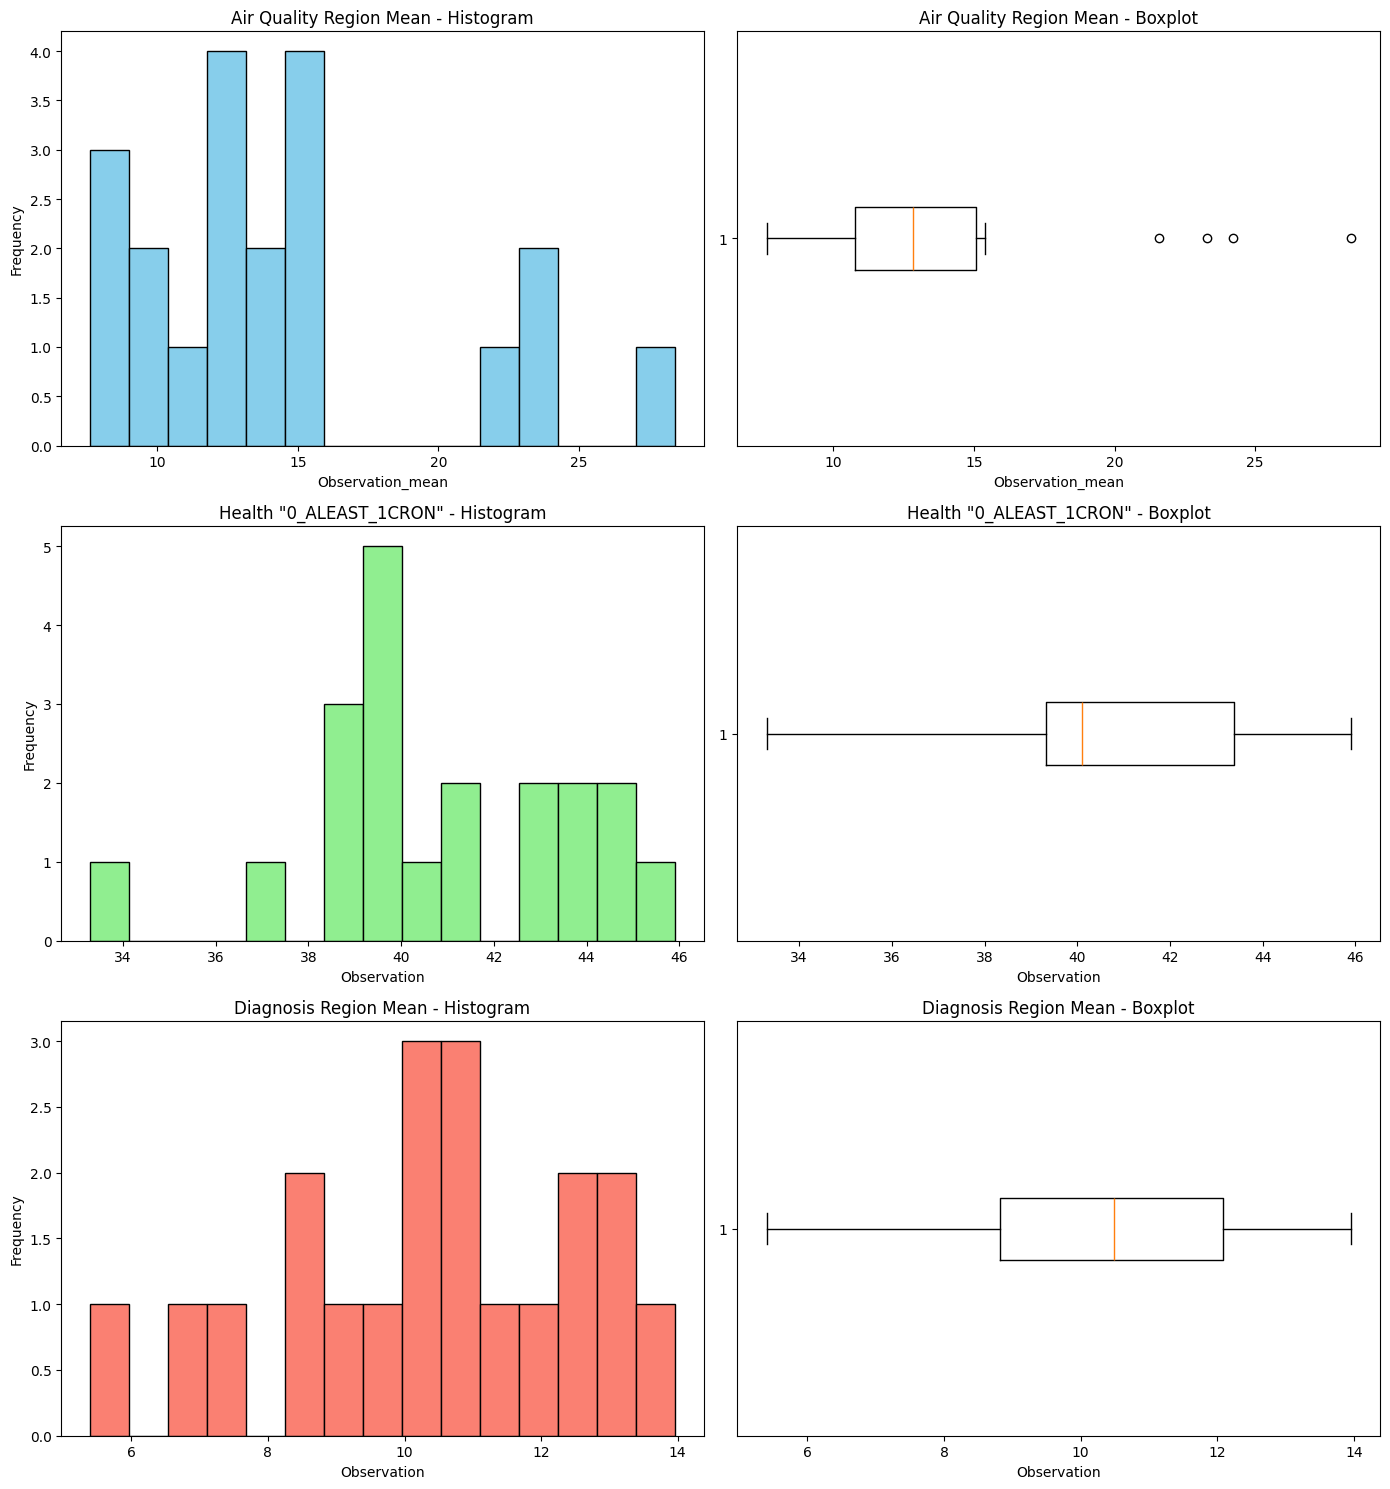

In [13]:

def descriptive_stats(df, obs_col):
    desc = df[obs_col].describe()
    cv = df[obs_col].std() / df[obs_col].mean()
    skewness = stats.skew(df[obs_col].dropna())
    kurtosis = stats.kurtosis(df[obs_col].dropna())
    return desc, cv, skewness, kurtosis

# Calculate stats: three datasets
desc_air, cv_air, skew_air, kurt_air = descriptive_stats(df_air_region_mean, 'Observation_mean')
desc_health, cv_health, skew_health, kurt_health = descriptive_stats(df_health_region_mean, 'Observation')
desc_diag, cv_diag, skew_diag, kurt_diag = descriptive_stats(df_diagnosis_region_mean, 'Observation')

# Print stats
print("Air Quality Region Mean - Observation_mean stats:")
print(desc_air)
print(f"CV: {cv_air:.3f}, Skewness: {skew_air:.3f}, Kurtosis: {kurt_air:.3f}\n")

print("Health '0_ALEAST_1CRON' Region Mean - Observation stats:")
print(desc_health)
print(f"CV: {cv_health:.3f}, Skewness: {skew_health:.3f}, Kurtosis: {kurt_health:.3f}\n")

print("Diagnosis Region Mean - Observation stats:")
print(desc_diag)
print(f"CV: {cv_diag:.3f}, Skewness: {skew_diag:.3f}, Kurtosis: {kurt_diag:.3f}\n")

# (histogram + boxplot)
fig, axs = plt.subplots(3, 2, figsize=(14, 15))

# Air data
axs[0, 0].hist(df_air_region_mean['Observation_mean'], bins=15, color='skyblue', edgecolor='black')
axs[0, 0].set_title('Air Quality Region Mean - Histogram')
axs[0, 0].set_xlabel('Observation_mean')
axs[0, 0].set_ylabel('Frequency')

axs[0, 1].boxplot(df_air_region_mean['Observation_mean'].dropna(), vert=False)
axs[0, 1].set_title('Air Quality Region Mean - Boxplot')
axs[0, 1].set_xlabel('Observation_mean')

# Health data
axs[1, 0].hist(df_health_region_mean['Observation'], bins=15, color='lightgreen', edgecolor='black')
axs[1, 0].set_title('Health "0_ALEAST_1CRON" - Histogram')
axs[1, 0].set_xlabel('Observation')
axs[1, 0].set_ylabel('Frequency')

axs[1, 1].boxplot(df_health_region_mean['Observation'].dropna(), vert=False)
axs[1, 1].set_title('Health "0_ALEAST_1CRON" - Boxplot')
axs[1, 1].set_xlabel('Observation')

# Diagnosis data
axs[2, 0].hist(df_diagnosis_region_mean['Observation'], bins=15, color='salmon', edgecolor='black')
axs[2, 0].set_title('Diagnosis Region Mean - Histogram')
axs[2, 0].set_xlabel('Observation')
axs[2, 0].set_ylabel('Frequency')

axs[2, 1].boxplot(df_diagnosis_region_mean['Observation'].dropna(), vert=False)
axs[2, 1].set_title('Diagnosis Region Mean - Boxplot')
axs[2, 1].set_xlabel('Observation')

plt.tight_layout()
plt.show()


# Geospatial Analysis

To address the first the research questions, the chronic health, respiratory disease and pollution rates across Italian regions are mapped using a choropleth map. This regional visualization of the country enables an initial analysis regarding disparities in the values. The map highlights on a color grade depending on the value, with higher values having a darker shade of the color. For the three datasets two cloroleth maps are created. The first map uses a continuous color scale reflecting the actual values of the observations, while the second map groups the values into six equally populated quantile classes to highlight the spatial differences more clearly to facilitate comparison across regions.

For the first research question, the cloropleth chart displays regional differences in chronic health observations across Italy. It specifically refers to how many people have at least one chronic disease among 100 people with the same characteristics. The left map uses a continuous green scale to represent the exact values. We can observe no real concentration of higher rates specific to any territory (North, South, etc), indicating gno trend in chronic health by region. The right map categorizes these values into quantiles, with the intention of making regional disparities more visually distinct by grouping them into six color-coded classes. Both maps reveal no clear divide within territories showing that chronic disease rates are distributed randomly across Italy.

For the second research question, the rate per 1000 people with a diagnosis of a respiratory disease is mapped. Again we plot two cloropleth maps to segregate the data. The visualizations show a concentration of a darker tone in the middle region of the country, while the south shows light tone and the north a middle shade between the two. This is evidence that there is a slight distinction in the diagnosis a respiratory disease rate, particularly with higher rates in the middle territory of Italy. 

Finally, for the third research question the pollution rates across Italian regions are mapped. This time the visualizations show a clear distinction between the Northern territories and the rest of the country. This suggests that there is a clear phenomenon that make the air quality to decrease in this regions. The quantile representation also make it evident that there is a considerable measure of pollutants in the middle western part of the country.  

## Cloropleth Maps

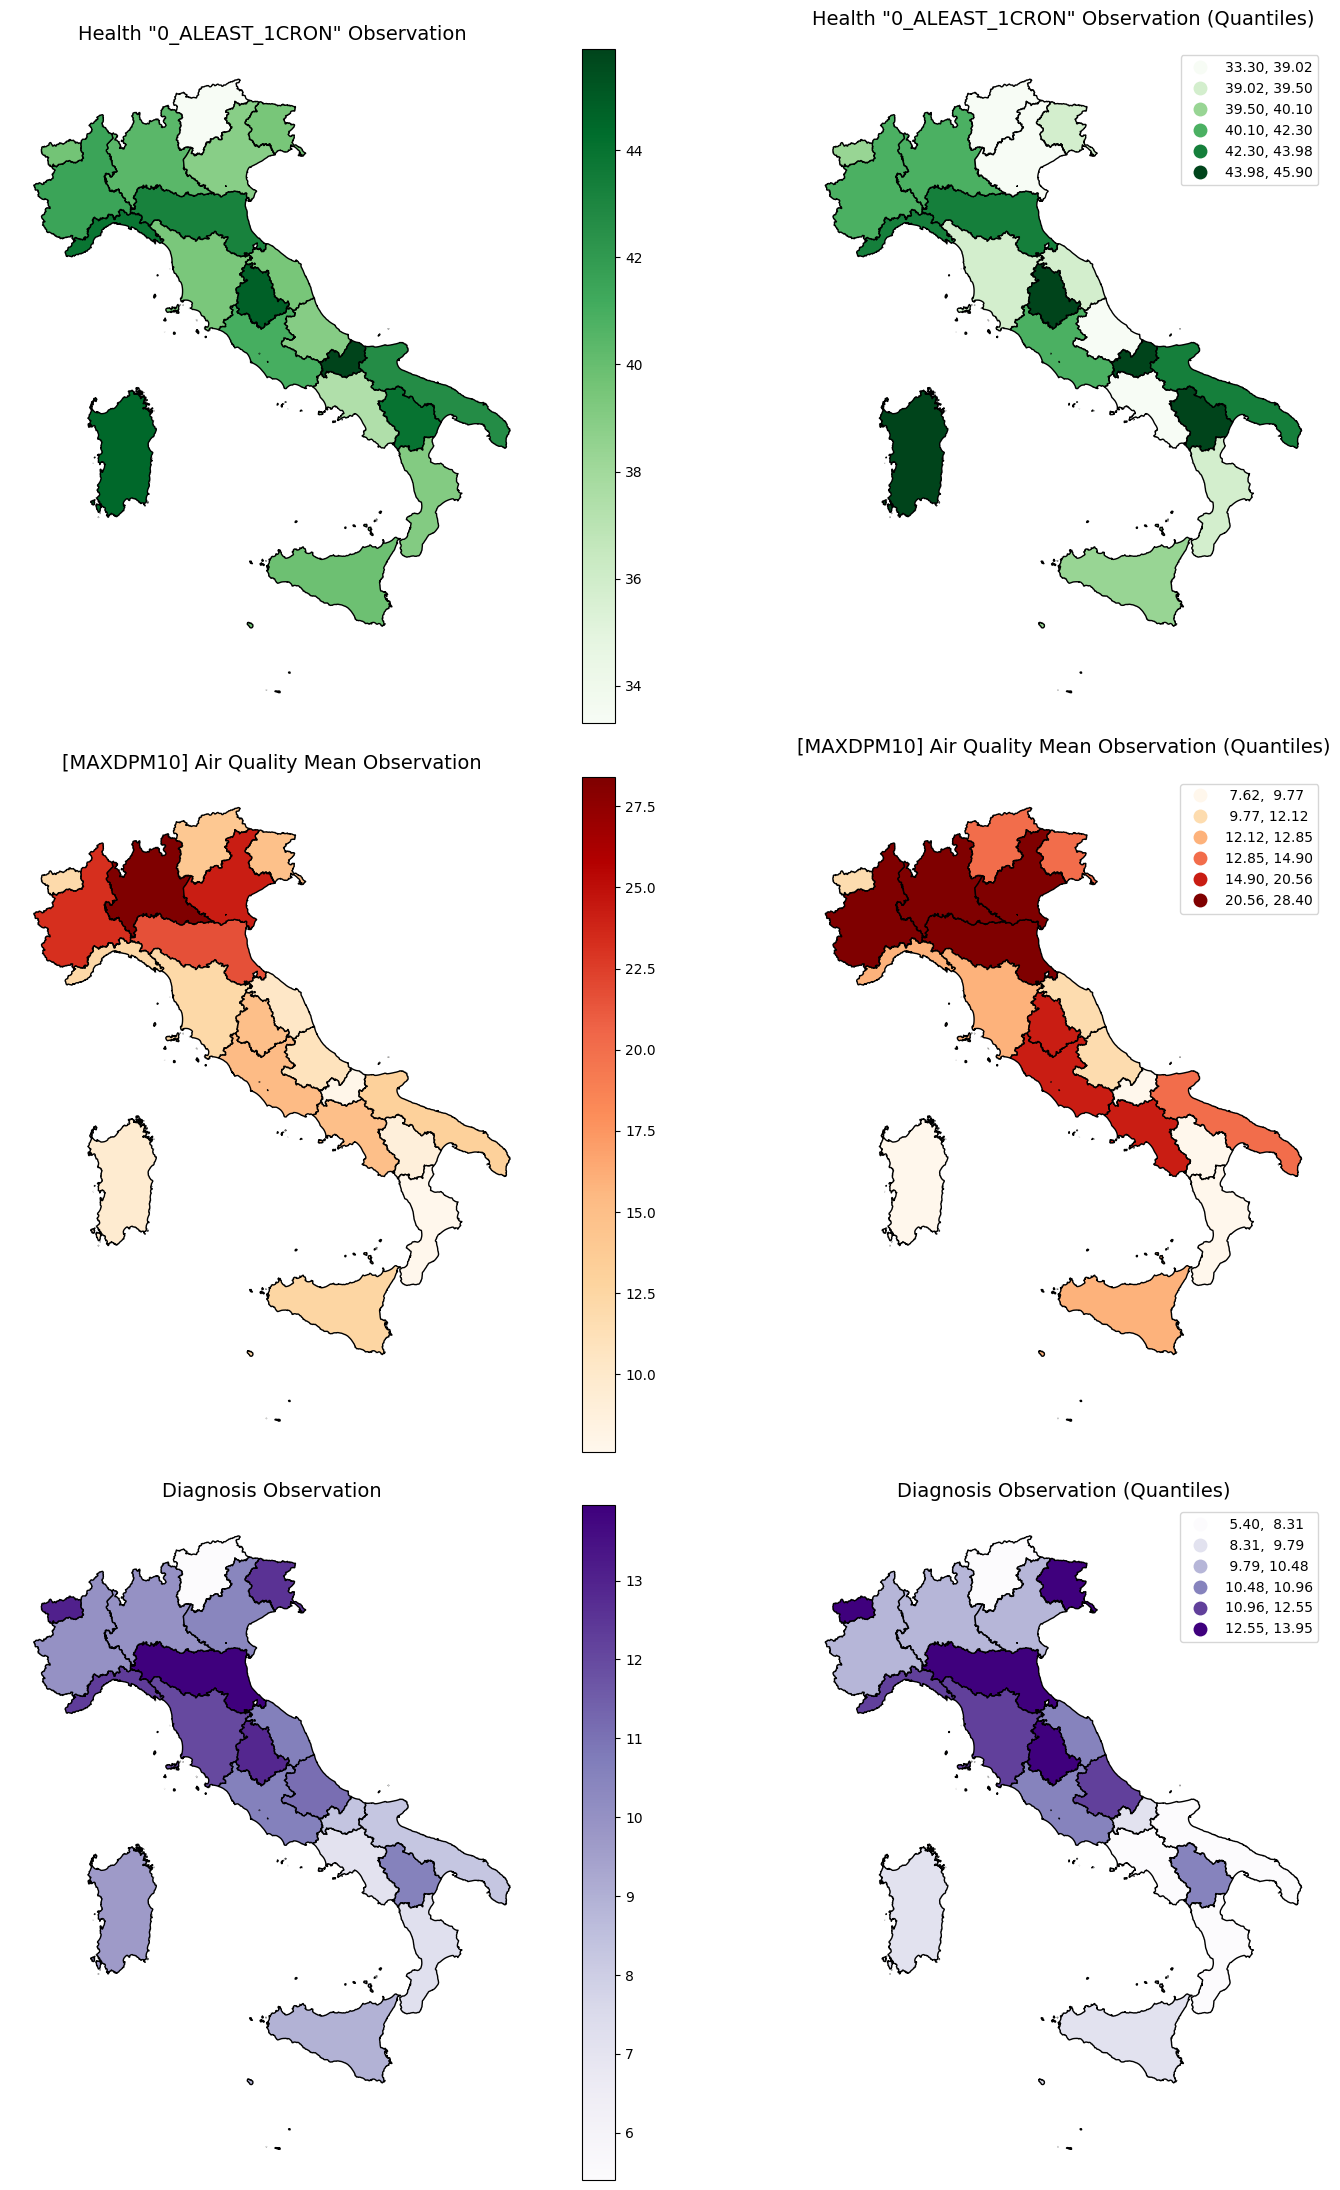

In [14]:
# Ensure all are GeoDataFrames
df_health_region_mean = gpd.GeoDataFrame(df_health_region_mean, geometry='geometry')
df_air_region_mean = gpd.GeoDataFrame(df_air_region_mean, geometry='geometry')
df_diagnosis_region_mean = gpd.GeoDataFrame(df_diagnosis_region_mean, geometry='geometry')

# Set up subplots: 3 rows, 2 columns
fig, axes = plt.subplots(3, 2, figsize=(18, 22))

# Plot 1: Good Health Observation
df_health_region_mean.plot(
    column="Observation",
    cmap="Greens",
    edgecolor="black",
    legend=True,
    ax=axes[0, 0]
)
axes[0, 0].set_title("Health \"0_ALEAST_1CRON\" Observation", fontsize=14)
axes[0, 0].set_axis_off()

# Plot 2: Good Health Observation (Quantiles)
df_health_region_mean.plot(
    column="Observation",
    cmap="Greens",
    edgecolor="black",
    legend=True,
    scheme="quantiles",
    k=6,
    ax=axes[0, 1]
)
axes[0, 1].set_title("Health \"0_ALEAST_1CRON\" Observation (Quantiles)", fontsize=14)
axes[0, 1].set_axis_off()

# Plot 3: Air Quality Mean Observation
df_air_region_mean.plot(
    column="Observation_mean",
    cmap="OrRd",
    edgecolor="black",
    legend=True,
    ax=axes[1, 0]
)
axes[1, 0].set_title("[MAXDPM10] Air Quality Mean Observation", fontsize=14)
axes[1, 0].set_axis_off()

# Plot 4: Air Quality Observation (Quantiles)
df_air_region_mean.plot(
    column="Observation_mean",
    cmap="OrRd",
    edgecolor="black",
    legend=True,
    scheme="quantiles",
    k=6,
    ax=axes[1, 1]
)
axes[1, 1].set_title("[MAXDPM10] Air Quality Mean Observation (Quantiles)", fontsize=14)
axes[1, 1].set_axis_off()

# Plot 5: Diagnosis Observation
df_diagnosis_region_mean.plot(
    column="Observation",
    cmap="Purples",
    edgecolor="black",
    legend=True,
    ax=axes[2, 0]
)
axes[2, 0].set_title("Diagnosis Observation", fontsize=14)
axes[2, 0].set_axis_off()

# Plot 6: Diagnosis Observation (Quantiles)
df_diagnosis_region_mean.plot(
    column="Observation",
    cmap="Purples",
    edgecolor="black",
    legend=True,
    scheme="quantiles",
    k=6,
    ax=axes[2, 1]
)
axes[2, 1].set_title("Diagnosis Observation (Quantiles)", fontsize=14)
axes[2, 1].set_axis_off()

# Adjust layout
plt.tight_layout()
plt.show()


## Moran I
To add another layer of analysis to the first three research questions, Moran's I is used to assess the degree of spatial autocorrelation, helping to determine whether similar pollution rates tend to cluster in nearby regions. The same is done for chronic disease rates and respiratory disease rates. 

To define the spatial relationships between regions, K-nearest neighbor (KNN) weights are used. The k-nearest neighbors criterion implies that two spatial units are considered as neighbors if their distance is equal, or less than equal, to the minimum possible distance that can be found amongst all the observations [14]. KNN is appropriate for Italy, because it ensures each region is connected to a fixed number of nearest neighbors, which is needed for isolated regions like islands. A for loop is employed to determine the optimal value of k, selecting the one that yields the highest Moran's I value. A random seed of 27 is set for reproducibility, and 999 permutations are performed to ensure a robust estimation of the p-value.


### Moran I (Chronic Health - Region Dataset)

In [15]:
## Chronic Health - Region

for k in range(2, 11):
    w_knn = lps.weights.KNN.from_dataframe(df_health_region_mean, k=k)
    w_knn.transform = "r"
    observation_values = df_health_region_mean["Observation"].values
    np.random.seed(27)
    moran = esda.Moran(observation_values, w_knn, permutations=999)
    if k == 2:
        print(f"k={k}, Moran's I: {moran.I}, P-value: {moran.p_sim} <--")
    else:
        print(f"k={k}, Moran's I: {moran.I}, P-value: {moran.p_sim}")

k=2, Moran's I: -0.14781201343931832, P-value: 0.319 <--
k=3, Moran's I: -0.06374896102831856, P-value: 0.489
k=4, Moran's I: -0.00010389716814354752, P-value: 0.284
k=5, Moran's I: -0.02142681542009558, P-value: 0.309
k=6, Moran's I: -0.009021005763610139, P-value: 0.248
k=7, Moran's I: -0.07257499410482883, P-value: 0.477
k=8, Moran's I: -0.0602223106730195, P-value: 0.456
k=9, Moran's I: -0.03837724004895997, P-value: 0.299
k=10, Moran's I: -0.04399737769400961, P-value: 0.318


The results show that for the observations of the Chronic-Health-Region dataset, show that the Moran's I values are consistently negative and close to zero across all tested k-nearest neighbor configurations. This indicates no significant spatial autocorrelation in the chronic health observation data across regions.
Also, P-values are all > 0.05, showcasing the lack of statistical significance regardless of the choice of 
k. In summary the data shows that there is no spatial clustering or dispersion based on the chronic health observations. This suggests that regional similarity in chronic health outcomes is weak.

### Moran I (Diagnosis-Region Dataset)

In [16]:
for k in range(2, 11):
    w_knn = lps.weights.KNN.from_dataframe(df_diagnosis_region_mean, k=k)
    w_knn.transform = "r"
    observation_values = df_diagnosis_region_mean["Observation"].values
    np.random.seed(27)
    moran = esda.Moran(observation_values, w_knn, permutations=999)
    if k == 5:
        print(f"k={k}, Moran's I: {moran.I}, P-value: {moran.p_sim} <--")
    else:
        print(f"k={k}, Moran's I: {moran.I}, P-value: {moran.p_sim}")

k=2, Moran's I: 0.0796543490007209, P-value: 0.235
k=3, Moran's I: 0.2276832625851606, P-value: 0.042
k=4, Moran's I: 0.1517321558853057, P-value: 0.063
k=5, Moran's I: 0.2234253816735667, P-value: 0.019 <--
k=6, Moran's I: 0.13739204759933746, P-value: 0.037
k=7, Moran's I: 0.08861081031483985, P-value: 0.061
k=8, Moran's I: 0.07513865631988545, P-value: 0.059
k=9, Moran's I: 0.07748742618005297, P-value: 0.048
k=10, Moran's I: 0.04646549718408549, P-value: 0.06


In [17]:
w_knn = lps.weights.KNN.from_dataframe(df_diagnosis_region_mean, k=5)
w_knn.transform = "r"
observation_values = df_diagnosis_region_mean["Observation"].values
np.random.seed(27)
moran_knn = esda.Moran(observation_values, w_knn, permutations=999)
print(f"Moran's I: {moran_knn.I}")
print(f"P-value: {moran_knn.p_sim}")

Moran's I: 0.2234253816735667
P-value: 0.019


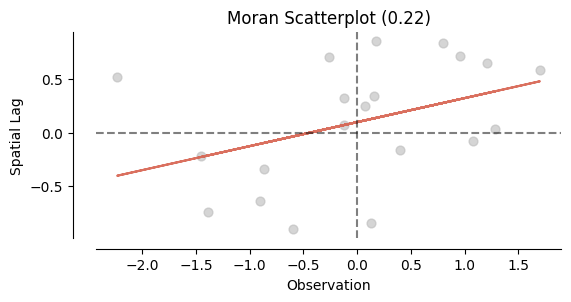

In [18]:
fig, ax = plt.subplots(figsize=(6, 6))
splot.moran_scatterplot(moran_knn, ax=ax)
ax.set_xlabel("Observation")
plt.show()

In [19]:
## Health regions LISA

# Compute Local Moran's I
lisa_knn = Moran_Local(observation_values, w_knn, permutations=999, seed=27)

# Identify significant observations
significant = lisa_knn.p_sim < 0.05
labels = df_diagnosis_region_mean[significant]

# Plot LISA cluster map
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
lisa_cluster(lisa_knn, df_diagnosis_region_mean, p=0.05, ax=ax)
ax.set_title("Local Spatial Autocorrelation of Respiratoty Diagnosis-Region Dataset Observation", fontsize=16)

# Annotate significant areas
for idx, row in labels.iterrows():
    x, y = row.geometry.centroid.x, row.geometry.centroid.y
    ax.text(x, y, row["regione"], fontsize=6, ha='center',
            color='lightgrey', weight='bold')

plt.show()
# fig.savefig('plots/lisa_cluster.png')


NameError: name 'Moran_Local' is not defined

The spatial autocorrelation results for Respiratory Diagnosis-Region based on Moran’s I show that clustering patterns have the highest value of Moran's I  and most statistically significant result when **k = 5** (Moran’s I = 0.223, *p* = 0.019). Because we get a statically significant result, we proceed with a LISA cluster map. The LISA cluster map highlights how respiratory health diagnoses are spatially distributed across Italian regions. The red zones (HH) represent areas with a high share of respiratory disease surrounded by similar regions. From the map it can be observed that central Italy has a high-high correlation. On the other hand, blue regions in the South form low-low clusters. Areas in grey show no significant spatial autocorrelation. This map adds another layer of insight by pointing out where respiratory health conditions cluster geographically and where exceptions occur. This map shows there is a clear regional dissimilarity regarding the respiratory disease rates. 


### Moran I (Air Quality-Region dataset)

In [ ]:
### Use this one air

for k in range(2, 11):
    w_knn = lps.weights.KNN.from_dataframe(df_air_region_mean, k=k)
    w_knn.transform = "r"
    observation_values = df_air_region_mean["Observation_mean"].values
    np.random.seed(27)
    moran = esda.Moran(observation_values, w_knn, permutations=999)
    if k == 4:
        print(f"k={k}, Moran's I: {moran.I}, P-value: {moran.p_sim} <--")
    else:
        print(f"k={k}, Moran's I: {moran.I}, P-value: {moran.p_sim}")

k=2, Moran's I: 0.09475757161581064, P-value: 0.208
k=3, Moran's I: 0.30748836970634685, P-value: 0.014
k=4, Moran's I: 0.40613558186704984, P-value: 0.003 <--
k=5, Moran's I: 0.3292245201241129, P-value: 0.003
k=6, Moran's I: 0.25529035369270175, P-value: 0.004
k=7, Moran's I: 0.23216456704079064, P-value: 0.005
k=8, Moran's I: 0.21248324352200876, P-value: 0.005
k=9, Moran's I: 0.2125076900410925, P-value: 0.003
k=10, Moran's I: 0.1712680635668901, P-value: 0.005


In [ ]:
# For the air regions

w_knn = lps.weights.KNN.from_dataframe(df_air_region_mean, k=4)
w_knn.transform = "r"
observation_values = df_air_region_mean["Observation_mean"].values
np.random.seed(27)
moran_knn = esda.Moran(observation_values, w_knn, permutations=999)
print(f"Moran's I: {moran_knn.I}")
print(f"P-value: {moran_knn.p_sim}")

Moran's I: 0.40613558186704984
P-value: 0.003


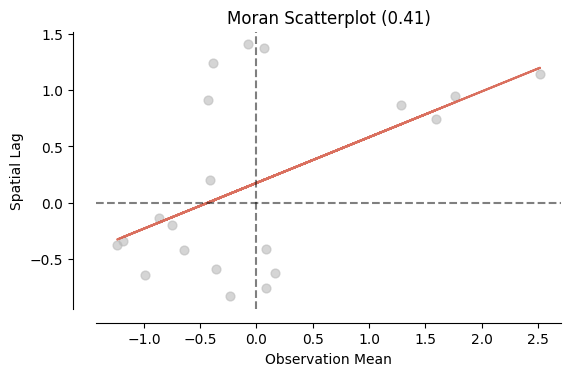

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6))
splot.moran_scatterplot(moran_knn, ax=ax)
ax.set_xlabel("Observation Mean")
plt.show()

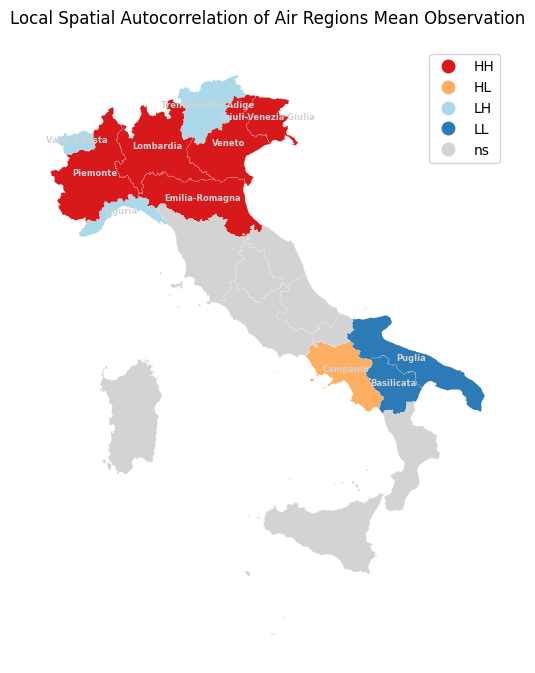

In [ ]:
# # Air regions LISA

# Compute Local Moran's I
lisa_knn = Moran_Local(observation_values, w_knn, permutations=999, seed=27)

# Identify significant observations
significant = lisa_knn.p_sim < 0.05
labels = df_air_region_mean[significant]

# Plot LISA cluster map
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
lisa_cluster(lisa_knn, df_air_region_mean, p=0.05, ax=ax)
ax.set_title("Local Spatial Autocorrelation of Air Regions Mean Observation")

# Annotate significant areas
for idx, row in labels.iterrows():
    x, y = row.geometry.centroid.x, row.geometry.centroid.y
    ax.text(x, y, row["regione"], fontsize=6, ha='center',
            color='lightgrey', weight='bold')

plt.show()
# fig.savefig('plots/lisa_cluster.png')


The spatial autocorrelation results for Air Quality-Region dataset based on Moran’s I show that clustering patterns are strongest and most statistically significant when k = 4 (Moran’s I = 0.406, p = 0.003). Since we observe clear spatial autocorrelation, we proceed with a LISA cluster map. The LISA map highlights how air quality observations of PM10 are distributed across Italian regions. 

The map clearly highlights a high-high (HH) cluster in the North, showing high air pollution values surrounded by similarly high regions. Trentino Alto Adige, Val di Aosta and Liguria show as low-high. This means they have significantly lower pollution rates than their neighbors.  On the other hand, there is a low-low (LL) cluster in the South, indicating consistently lower values in the region. Basilicata and Campania appear as high-low (HL) outliers, meaning they have high values compared to surrounding lower-value regions.  The spatial distribution emphasizes a clear distinction between the air quality in the North and South revealing regional disparities that align with known environmental and industrial patterns.

## Pearsons Correlation

## Chronic and Air

In [ ]:
print("Columns in health regions mean:", df_health_region_mean.columns)
print("Columns in air regions mean:", df_air_region_mean.columns)


Columns in health regions mean: Index(['regione', 'Observation', 'DATA_TYPE', 'TIME_PERIOD', 'geometry'], dtype='object')
Columns in air regions mean: Index(['regione', 'Observation_mean', 'DATA_TYPE', 'geometry', 'TIME_PERIOD'], dtype='object')


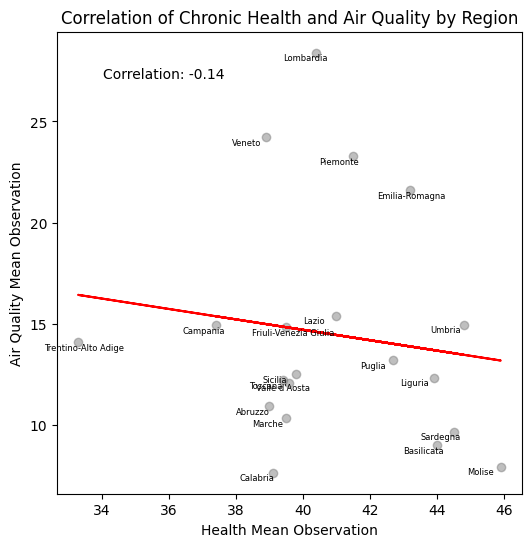

In [ ]:

# Merge air and health data on 'Territory'
df_both = df_health_region_mean.merge(
    df_air_region_mean.drop(columns=['geometry']),
    on="regione",
    suffixes=('_health', '_air')
)

df_both.rename(columns={
    'Observation': 'Observation_health',
    'Observation_mean': 'Observation_mean_air'
}, inplace=True)

# Compute correlation
correlation = df_both['Observation_health'].corr(df_both['Observation_mean_air'])

# Create scatter plot
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.scatter(df_both['Observation_health'], df_both['Observation_mean_air'],
           color='grey', alpha=0.5)

# Add title and labels
ax.set_title("Correlation of Chronic Health and Air Quality by Region")
ax.set_xlabel("Health Mean Observation")
ax.set_ylabel("Air Quality Mean Observation")

# Fit and plot regression line
z = np.polyfit(df_both['Observation_health'], df_both['Observation_mean_air'], 1)
p = np.poly1d(z)
ax.plot(df_both['Observation_health'], p(df_both['Observation_health']),
        color='red')

# Add correlation value to plot
ax.text(0.1, 0.9, f"Correlation: {correlation:.2f}",
        transform=ax.transAxes)

# Annotate points with region labels
for idx, row in df_both.iterrows():
    ax.text(row['Observation_health'] - 1,
            row['Observation_mean_air'] - 0.4,
            row['regione'], fontsize=6)

plt.show()
# fig.savefig('plots/neet_unempl_corr.png')


In [ ]:
X = df_both['Observation_mean_air']
y = df_both['Observation_health']
X = sm.add_constant(X)
ols_model = sm.OLS(y, X).fit()
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:     Observation_health   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                 -0.036
Method:                 Least Squares   F-statistic:                    0.3398
Date:                Sat, 28 Jun 2025   Prob (F-statistic):              0.567
Time:                        14:29:22   Log-Likelihood:                -49.642
No. Observations:                  20   AIC:                             103.3
Df Residuals:                      18   BIC:                             105.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   41.9100 

The scatter plot shows the relationship between chronic health conditions and air quality across Italian regions. Each point represents a region, with the x-axis indicating the mean chronic health observation and the y-axis representing the average air quality measurement. The overall correlation is weakly negative (r = –0.14). The red regression line confirms the downward trend, but the data points are widely dispersed. Overall, this chart suggests no strong linear relationship between chronic disease prevalence and air quality at the regional level.

The OLS regression analysis between air quality and chronic health observations also confirms that there is no significant linear relationship between the two variables at the regional level. Although the coefficient for air quality (Observation_mean_air) is negative (–0.0719), and it might suggest a slight inverse association, the p value is not statistically significant (p = 0.567). The R squared value of the model explains just 1.9% of the variance (R² = 0.019), and the adjusted R² is negative, indicating poor model fit. Overall, these results indicate that air quality alone does not significantly predict regional chronic health patterns.


## For Respiratory Diagnosis and Air Quality

      regione MAIN_DIAGNOSIS  \
0     Abruzzo         RESPIR   
1  Basilicata         RESPIR   
2    Calabria         RESPIR   

                                            geometry  population  \
0  POLYGON ((901822.804 4760729.009, 901877.308 4...     1268430   
1  MULTIPOLYGON (((1073707.061 4445700.105, 10737...      529897   
2  MULTIPOLYGON (((1083358.846 4416348.74, 108334...     1832147   

   Observation_diagnosis  Observation_mean_air DATA_TYPE  TIME_PERIOD  
0              11.114527             10.923077  MAXDPM10         2022  
1              10.547333              9.000000  MAXDPM10         2022  
2               7.230315              7.623529  MAXDPM10         2022  
Columns in merged DataFrame: Index(['regione', 'MAIN_DIAGNOSIS', 'geometry', 'population',
       'Observation_diagnosis', 'Observation_mean_air', 'DATA_TYPE',
       'TIME_PERIOD'],
      dtype='object')


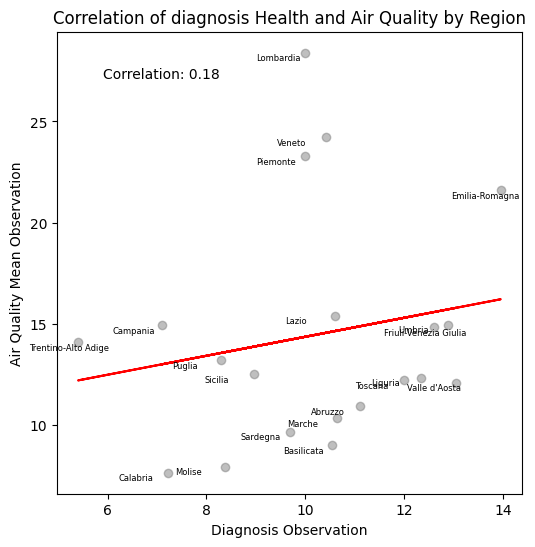

In [ ]:

# Merge air and health data on 'regione'
df_both = df_diagnosis_region_mean.merge(
    df_air_region_mean.drop(columns=['geometry']),
    on="regione",
    suffixes=('_health', '_air')
)

df_both.rename(columns={
    'Observation': 'Observation_diagnosis',
    'Observation_mean': 'Observation_mean_air'
}, inplace=True)

print(df_both.head(3))  # Display the first few rows of the merged DataFrame
print("Columns in merged DataFrame:", df_both.columns)


# Compute correlation
correlation = df_both['Observation_diagnosis'].corr(df_both['Observation_mean_air'])

# Create scatter plot
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.scatter(df_both['Observation_diagnosis'], df_both['Observation_mean_air'],
           color='grey', alpha=0.5)

# Add title and labels
ax.set_title("Correlation of diagnosis Health and Air Quality by Region")
ax.set_xlabel("Diagnosis Observation")
ax.set_ylabel("Air Quality Mean Observation")

# Fit and plot regression line
z = np.polyfit(df_both['Observation_diagnosis'], df_both['Observation_mean_air'], 1)
p = np.poly1d(z)
ax.plot(df_both['Observation_diagnosis'], p(df_both['Observation_diagnosis']),
        color='red')

# Add correlation value to plot
ax.text(0.1, 0.9, f"Correlation: {correlation:.2f}",
        transform=ax.transAxes)

# Annotate points with region labels
for idx, row in df_both.iterrows():
    ax.text(row['Observation_diagnosis'] - 1,
            row['Observation_mean_air'] - 0.4,
            row['regione'], fontsize=6)

plt.show()
# fig.savefig('plots/neet_unempl_corr.png')


In [ ]:
X = df_both['Observation_mean_air']
y = df_both['Observation_diagnosis']
X = sm.add_constant(X)
ols_model = sm.OLS(y, X).fit()
print(ols_model.summary())

                              OLS Regression Results                             
Dep. Variable:     Observation_diagnosis   R-squared:                       0.034
Model:                               OLS   Adj. R-squared:                 -0.020
Method:                    Least Squares   F-statistic:                    0.6340
Date:                   Sat, 28 Jun 2025   Prob (F-statistic):              0.436
Time:                           14:29:22   Log-Likelihood:                -43.566
No. Observations:                     20   AIC:                             91.13
Df Residuals:                         18   BIC:                             93.12
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

The analysis explores the relationship between the regional air quality and the rate per 1000 people with a diagnosis of a respiratory disease, using ordinary least squares (OLS) regression. The scatter plot shows a weak positive correlation (Pearson’s r = 0.18), suggesting that regions with slightly worse air quality tend to have marginally more diagnoses. The OLS regression shows that this relationship only explains 3.4% of the variation (R² = 0.034). Moreover, the p-value for the air quality coefficient is 0.436, above the 0.05 threshold, implying that the observed trend is not statistically significant. The confidence interval for the coefficient air quality observation ranges from [-0.119, 0.264], which includes zero, reinforcing the lack of a meaningful association. Overall, these results suggest no strong or reliable relationship  between air quality and diagnosis rates at the regional level in this dataset

## Conclusions

This project investigated the spatial relationship between air pollution and disease prevalence in Italy, focusing particularly on PM10 levels, chronic health conditions, and diagnoses of respiratory diseases. Using data from ISTAT and geospatial analysis tools, the study aimed to determine whether regional patterns of air quality correlate with public health outcomes.

The spatial distribution of chronic diseases showed minimal geographic clustering, as supported by the Moran’s I results and choropleth maps. Chronic health conditions appear evenly distributed across the country, with no significant spatial autocorrelation. This suggests that chronic disease prevalence in Italy may be more influenced by factors beyond air quality, such as demographic, genetic, or behavioral variables.

The respiratory diseases displayed moderate spatial autocorrelation. Moran’s I and the LISA cluster map revealed significant clustering in central Italy and the south, suggesting that some regional patterns in respiratory health may exist.

Air pollution, specifically PM10 levels, exhibited strong spatial clustering, with a clear divide between the  North and the South. The North showed clear high rates of pollution, while the south consistently had lower rates. Moran’s I confirmed significant autocorrelation, and LISA analysis identified several high-high clusters in industrial northern regions and low-low clusters in the South. This results align with known geography factors and high industrialization that concentrate pollutants in the area.

The statistical correlation between air quality and both chronic disease and respiratory diagnosis rates was weak and not significant. Linear regression models showed low R² values, meaning that the this correlation did not explain the any regional pattern present. Also, neither of the two rates studied showed a statistically meaningful dependence on regional pollution levels in this dataset.

In summary, while air pollution clearly clusters geographically, with high pollution rates in the North, and respiratory illnesses show some spatial patterns, no strong linear association was found between pollution and disease at the regional level. This suggests that other factors may be more influential. Also a more granular level on disease and pollutions rates, were the rates are studied at a municipal level, may be able to detect a casual link.


# Bibliography

1. World Health Organization. (2024). Ambient (outdoor) air pollution exposure. https://www.who.int/teams/environment-climate-change-and-health/air-quality-energy-and-health/health-impacts/exposure-air-pollution (Accessed June 25, 2025)
2. World Health Organization. (2021). WHO global air quality guidelines: Particulate matter (PM₂.₅ and PM₁₀), ozone, nitrogen dioxide, sulfur dioxide and carbon monoxide. World Health Organization. https://www.who.int/publications/i/item/9789240034228
3. California Air Resources Board. (n.d.). Inhalable particulate matter and health (PM₂.₅ and PM₁₀). Retrieved June 25, 2025, from https://ww2.arb.ca.gov/resources/inhalable-particulate-matter-and-health
4. Renzi, M., Scortichini, M., Forastiere, F., de' Donato, F., Michelozzi, P., Davoli, M., Gariazzo, C., Viegi, G., Stafoggia, M., Ancona, C., Bucci, S., de' Donato, F., Michelozzi, P., Renzi, M., Scortichini, M., Stafoggia, M., Bonafede, M., Gariazzo, C., Marinaccio, A., Argentini, S., ... Carlino, G. (2022). A nationwide study of air pollution from particulate matter and daily hospitalizations for respiratory diseases in Italy. Science of The Total Environment, 807, 151034. https://doi.org/10.1016/j.scitotenv.2021.151034
5. Viegi, G., Baldacci, S., Maio, S., Fasola, S., Annesi-Maesano, I., Pistelli, F., Carrozzi, L., La Grutta, S., & Forastiere, F. (2020). Health effects of air pollution: A Southern European perspective. *Chinese Medical Journal, 133*(13), 1568–1574. [https://doi.org/10.1097/CM9.0000000000000869](https://doi.org/10.1097/CM9.0000000000000869)
6. World Health Organization. (2024, December 23). Noncommunicable diseases. WHO. https://www.who.int/news-room/fact-sheets/detail/noncommunicable-diseases
7. ISTAT. (2024). Limiti amministrativi delle regioni italiane (geometry data) [Data file]. Italian National Institute of Statistics. Retrieved from: https://www.istat.it/storage/cartografia/confini_amministrativi/generalizzati/2024/Limiti01012024_g.zip
8. Italian National Institute of Statistics. (n.d.). Health status – regions and type of municipality [Data set]. ISTAT. Retrieved June 25, 2025, from https://esploradati.istat.it/databrowser/#/it/dw/categories/IT1,Z0810HEA,1.0/HEA_HESTDRUGS/HEA_HESTDRUGS_HEST/IT1,83_63_DF_DCCV_AVQ_PERSONE_208,1.0
9. Italian National Institute of Statistics. (n.d.). Air quality data for urban environments [Data set]. ISTAT. Retrieved June 25, 2025, from https://esploradati.istat.it/databrowser/#/en/dw/categories/IT1,Z0920ENV,1.0/ENV_CITIES/DCCV_URBANENV_AIRQU/IT1,609_1_DF_DCCV_URBANENV_4,1.0
10. World Health Organization Regional Office for the Eastern Mediterranean. (n.d.-a). Introduction: Respiratory tract diseases. World Health Organization. Retrieved June 27, 2025, from https://www.emro.who.int/health-topics/respiratory-tract-diseases/introduction.html
11. Mehta, S., Shin, H., Burnett, R., North, T., & Cohen, A. J. (2013). Ambient particulate air pollution and acute lower respiratory infections: A systematic review and implications for estimating the global burden of disease. Air Quality, Atmosphere & Health, 6(1), 69–83. https://doi.org/10.1007/s11869-011-0146-3
12. Istituto Nazionale di Statistica. (n.d.). Health services: Outpatient specialist visits and diagnostic tests (HEA_SERVICES > DCIS_OSPSTRA) [Data set]. EsploraDati. Retrieved June 27, 2025, from https://esploradati.istat.it/databrowser/#/en/dw/categories/IT1,Z0810HEA,1.0/HEA_SERVICES/DCIS_OSPSTRA/
13. Istituto Nazionale di Statistica. (2025). Resident population by age, sex, and marital status on 1st January 2025. Retrieved June 27, 2025, from https://demo.istat.it/app/?i=POS&l=en
14. Giuliani, D. (2024). Spatial autocorrelation: Geospatial analysis and representation for data science [Lecture presentation]. University of Trento.

